author : sybyeon1102@gmail.com

## import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
from scipy import stats

# 선형회귀분석 (허리둘레 예시)

In [4]:
data = pd.read_csv('./data/국민건강보험공단_건강검진정보_20211229.CSV', encoding='euc-kr')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자 일련번호      1000000 non-null  int64  
 2   시도코드          1000000 non-null  int64  
 3   성별코드          1000000 non-null  int64  
 4   연령대 코드(5세단위)  1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg 단위)    1000000 non-null  int64  
 7   허리둘레          999892 non-null   float64
 8   시력(좌)         999743 non-null   float64
 9   시력(우)         999748 non-null   float64
 10  청력(좌)         999778 non-null   float64
 11  청력(우)         999770 non-null   float64
 12  수축기 혈압        992468 non-null   float64
 13  이완기 혈압        992466 non-null   float64
 14  식전혈당(공복혈당)    992398 non-null   float64
 15  총 콜레스테롤       402306 non-null   float64
 16  트리글리세라이드      402322 non-null   float64
 17  HDL 콜레스테롤     402315 non-nul

,기준년도,가입자 일련번호,시도코드,성별코드,연령대 코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마 지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,치석,데이터 공개일자
0,2020,1,36,1,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,1.0,0.0,0,NaN,NaN,2021-12-29
1,2020,2,27,2,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,1.0,0.0,0,NaN,NaN,2021-12-29
2,2020,3,11,2,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,1.0,0.0,0,NaN,NaN,2021-12-29
3,2020,4,31,1,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,1.0,0.0,1,0.0,0.0,2021-12-29
4,2020,5,41,2,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,1.0,0.0,0,NaN,NaN,2021-12-29


In [5]:
data.columns

Index(['기준년도', '가입자 일련번호', '시도코드', '성별코드', '연령대 코드(5세단위)', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기 혈압',
       '이완기 혈압', '식전혈당(공복혈당)', '총 콜레스테롤', '트리글리세라이드', 'HDL 콜레스테롤', 'LDL 콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마 지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '치석', '데이터 공개일자'],
      dtype='object')

In [6]:
samples = data.loc[:199, ['허리둘레', '식전혈당(공복혈당)']]

In [7]:
samples

,허리둘레,식전혈당(공복혈당)
0,72.1,90.0
1,81.0,87.0
2,70.0,102.0
3,90.8,146.0
4,75.2,110.0
...,...,...
195,65.0,124.0
196,86.0,109.0
197,80.0,108.0
198,64.0,88.0


In [8]:
samples.dropna(inplace=True)

In [9]:
X = samples['허리둘레']
y = samples['식전혈당(공복혈당)']

In [10]:
X = np.array(X).reshape(-1, 1)
y = np.array(y).reshape(-1, 1)

## LinearRegression()

In [11]:
line_fitter = LinearRegression()
line_fitter.fit(X, y)

LinearRegression()

In [12]:
a, b = line_fitter.coef_, line_fitter.intercept_
a, b

(array([[0.66930635]]), array([52.28325372]))

In [13]:
y_pred = line_fitter.predict(X)

In [14]:
X.min(), X.max()

(53.0, 110.0)

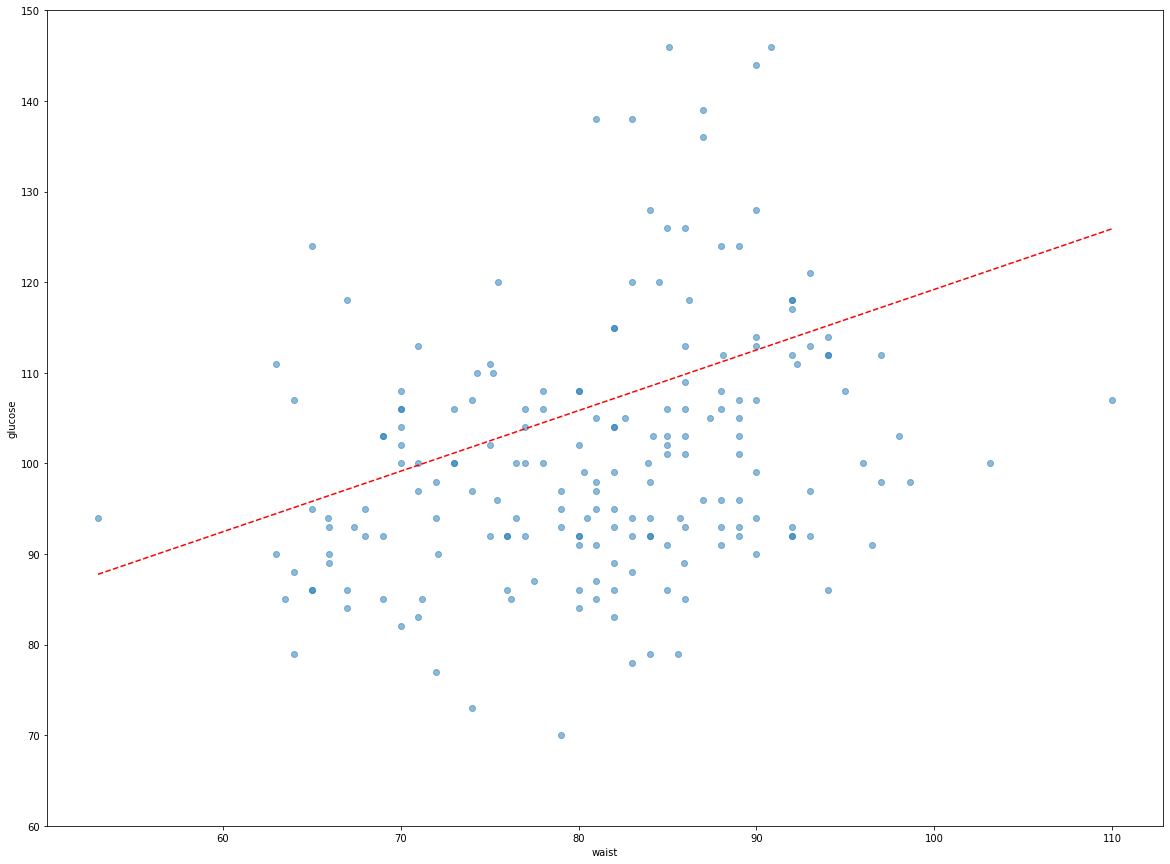

In [15]:
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111)


ax.scatter(X, y, alpha=0.5)

xs = np.linspace(X.min(), X.max(), 100)
ys = (a*xs + b).reshape(-1, 1)
ax.plot(xs, ys, color='red', ls='--')

ax.set_xlabel('waist')
ax.set_ylabel('glucose')
ax.set_ylim(60, 150)
# ax.set_xlim(60, 100)

plt.show()

# 적합도 검증

<a href="https://jitolit.tistory.com/31">파이썬을 이용한 머신러닝 ) 단일선형회기분석</a>

In [16]:
residuals = y - (y_pred)
residuals[:10]

array([[-10.54024121],
       [-19.49706768],
       [  2.86530211],
       [ 32.94373013],
       [  7.38490912],
       [-29.19805017],
       [135.47125617],
       [-20.85943748],
       [ -3.16637403],
       [-14.9378655 ]])

In [17]:
# SSE, SST
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
SSE, SST

(197686.621918188, 205574.68341708538)

In [18]:
# 결정계수
R_squared = 1 - (SSE/SST)
R_squared

0.03837078266536109

- 너무 작은데.?

## 공분산과 상관계수

<a href="https://ordo.tistory.com/100">[Python] 상관분석(Correlation Analysis), [산점도, 공분산, 상관계수, 검정]</a>

In [19]:
np.cov(samples, rowvar=False)

array([[  88.93141719,   59.52236181],
       [  59.52236181, 1038.25597685]])

In [20]:
np.mean(y), np.std(y)

(106.68844221105527, 32.140918003941756)

In [21]:
np.corrcoef(samples, rowvar=False)

array([[1.        , 0.19588462],
       [0.19588462, 1.        ]])

## 상관계수의 검정

In [22]:
X.shape

(199, 1)

In [23]:
np.ravel(X)

array([ 72.1,  81. ,  70. ,  90.8,  75.2,  94. ,  93. ,  92. ,  82. ,
        71.2,  84. ,  63. ,  90. ,  89. ,  75.4,  96. ,  90. ,  90. ,
        81. ,  76. ,  85. ,  65.9,  79. , 110. ,  76.5,  77.5,  87. ,
        82. ,  82. ,  77. ,  85. ,  67. ,  80. ,  73. ,  85. ,  72. ,
        81. ,  84. ,  79. ,  80. ,  76.2,  72. ,  81. ,  63.5,  85. ,
        90. ,  89. ,  94. ,  82. ,  80. ,  75. ,  68. ,  97. ,  88. ,
        90. ,  84. ,  89. ,  68. ,  85.7,  89. ,  90. ,  83. ,  69. ,
        98. ,  75. ,  80. ,  79. ,  73.2,  85. ,  65. ,  90. ,  89. ,
        97. ,  69. ,  89. ,  86. ,  73. ,  87. ,  85. ,  86. ,  93. ,
        64. ,  67. ,  85.9,  88. ,  86.2,  83. ,  88. ,  69. ,  80. ,
        95. ,  81. ,  67.4,  93. ,  74.3,  69. ,  94. ,  92. ,  82. ,
        86. ,  65. ,  76.5,  99.1,  74. ,  71. ,  94. ,  98.6,  70. ,
        80. ,  81. ,  88. ,  82. ,  77. ,  66. ,  70. ,  85.6,  74. ,
        93. ,  86. ,  84. ,  70. ,  71. ,  83.9,  82. ,  84. ,  83. ,
        76. ,  63. ,

In [24]:
stats.pearsonr(np.ravel(X), np.ravel(y))

(0.19588461569342597, 0.005557648191447981)